In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import copy 

import seaborn as sns
sns.set(color_codes=True)

from copy import copy
from scipy.spatial.distance import jensenshannon as JSD 

from scipy.stats import entropy as DKL

/home/acevedo/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


In [2]:
from sklearn.model_selection import train_test_split

def split_dataset(data, n:float, seed=0):
    dummy_labels = np.ones(data.shape[0])
    X_train, X_test, y_train, y_test = train_test_split(data, dummy_labels, test_size=n, random_state=seed)
    return [X_train, X_test]


In [3]:
def my_score(data):
    r = np.exp(data)
    return np.mean(r)

In [4]:
def DKL_plus(pk_, qk_, epsilon = 0.01):
    
    """   
    n = pk.shape[0]    
    normed_pk = normalize(pk.reshape(1,n),  norm='l1')
    normed_qk = normalize(qk.reshape(1,n), norm='l1')
    print(normed_pk)  
    """
    pk = copy(pk_)
    qk = copy(qk_)
    
    #print(pk.shape)
    a = np.sum(pk ==0)
    b = np.sum(qk ==0)
    # assert a ==0 and b ==0
    
    #if  a !=0 or b !=0:
        #print("Padding Zeroes")

    # Beware  zeros
    pk[pk==0] = epsilon
    qk[qk==0] = epsilon

    
    return DKL(pk,qk) 

In [5]:
my_data = pd.read_csv('../data/DS_1.csv', header=None) .values
gan_data = pd.read_csv('../data/gan_dirichlet_1.csv', header=None) .values

In [6]:
n = 10000
ds_gan = copy(gan_data[0:n,:])
ds_training = copy(my_data [0:n,:])

ds_malo = copy(ds_training) 
np.random.shuffle(ds_malo)

ds_malo +=  np.random.random_sample()


In [7]:
print(np.sum(ds_gan ==0))
print(np.sum(ds_training ==0))

0
3775


In [ ]:
def unload_list(data):
    r = np.array(data)
    return r[r < 1e08]

# JSD de datos GAN y Training

In [ ]:
ds_gan[ds_gan ==0] = 0.0001
ds_training[ds_training==0]= 0.001

entropy2 = [DKL_plus(ds_gan[k,:], ds_training[k,:]) for k in range(5)]
distancias_buenas = np.array(entropy2)

In [ ]:
distancias_buenas[distancias_buenas < 1e08]

In [ ]:
sns.distplot(distancias_buenas) 

# Vovlemos a calcular el histograma de los JSD para el dataset permutrado con ruido

In [ ]:

c = copy(ds_gan)
np.random.shuffle(c) # this functions is inplace

d = copy(ds_training)  + np.random.random_sample()
np.random.shuffle(d)


In [ ]:
entropy3 = [DKL_plus(c[k,:], d[k,:]) for k in range(n)]
distancias_malas = np.array(entropy3)
print(distancias_malas.mean())
print(distancias_buenas.mean())
# Histograms

sns.distplot(unload_list(distancias_buenas))

sns.distplot(unload_list(distancias_malas))


# Otra vez

In [ ]:

g = copy(ds_gan)
np.random.shuffle(g) # this functions is inplace

h = copy(ds_training)  
np.random.shuffle(h)

entropy4 = [DKL_plus(g[k,:], h[k,:]) for k in range(n)]
distancias_buenas2 = np.array(entropy4)

sns.distplot(unload_list(distancias_buenas))

sns.distplot(unload_list(distancias_buenas2))


# Usamos DKL para ver la diferencia entre estas distribuciones

In [ ]:
DKL(distancias_malas, distancias_buenas)

In [ ]:
print(distancias_buenas.mean())
print(distancias_malas.mean())


In [ ]:
DKL(distancias_buenas2, distancias_buenas)

# Resumiendolo el vector de distancias JS

In [ ]:
my_score(distancias_malas)

In [ ]:
my_score(distancias_malas) > my_score(distancias_buenas)

In [ ]:
k = 98 # 78

sns.distplot(ds_training[:,k])

sns.distplot(ds_gan[:,k])


sns.distplot(ds_malo[:,k])

# Esto no hace sentido porque le esto es darle el vector de especies k de todos el dataset. JSD 
# es para para distancias entre vectores de probailidad
print(distance.jensenshannon(ds_gan[:,k],ds_training[:,k]))

print(distance.jensenshannon(ds_training[:,k],ds_training[:,k]))

print(distance.jensenshannon(ds_malo[:,k],ds_training[:,k]))


In [ ]:
DKL(ds_gan[:,k],ds_training[:,k])

# Last

In [ ]:
a1= JSD(ds_training, ds_gan)

a1[a1 < 1e08].mean()

In [ ]:
a2 =JSD(ds_training, ds_gan + np.random.random_sample())

a2[a2 < 1e08].mean()

In [ ]:
ds_roto = np.random.rand(10000,100)

"""


for k in range(10000):
    ds_roto[k,:] = ds_gan[k,:] + np.random.random_sample()
"""

In [ ]:
bueno = JSD(ds_training, ds_gan)

In [ ]:
malo = JSD(ds_training,ds_roto )

In [ ]:
ds_roto.mean()

In [ ]:
ds_gan.std()

In [ ]:
ds_training.std()

In [ ]:
bueno < malo

# Second round

In [8]:
print(ds_training.mean(axis=0).sum())
print(ds_gan.mean(axis=0).sum())
print(ds_malo.mean(axis=0).sum())

1.0
1.000000000316062
7.178391404395601


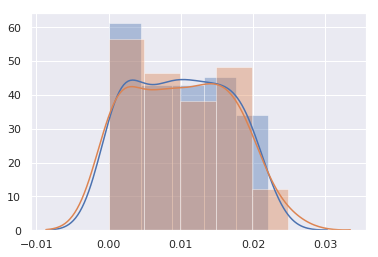

In [9]:
sns.distplot(ds_training.mean(axis=0))

sns.distplot(ds_gan.mean(axis=0))


#sns.distplot(ds_malo.mean(axis=0))


In [10]:
DKL(ds_gan.mean(axis=0), ds_training.mean(axis=0))

0.014635214980626745

In [11]:
DKL(ds_malo.mean(axis=0), ds_training.mean(axis=0))

0.33047330453604273

In [12]:
ds_gan.shape

(10000, 100)